### Writing an iterator to load data in chunks

We can read data in chunks as
DataFrames of a certain length, say, 100. For example, with the pandas package (imported as pd),
you can do `pd.read_csv(filename, chunksize=100)`. This creates an iterable reader object, which
means that you can use next() on it.

In [5]:
# Import the pandas package
import pandas as pd

# Initialize reader object: df_reader
df_reader = pd.read_csv('Data/indicators.csv', chunksize=5)

# Print two chunks
print(next(df_reader))
print(next(df_reader))

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  
                                 CountryName CountryCode  Year  \
5                                  Euro area         EMU  1960   
6  Europe & Central Asia (all income levels)         ECS  1960   
7    Europe & Central Asia (developing only)         ECA  1960   
8                             Eur

We will read in a file using a bigger DataFrame chunk size and then process
the data from the first chunk.
To process the data, we will create another DataFrame composed of only the rows from a specific
country. We will then zip together two of the columns from the new DataFrame, 'Total Population' 
and 'Urban population (% of total)'. Finally, we will create a list of tuples from the zip object,
where each tuple is composed of a value from each of the two columns mentioned.


In [20]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('Data/indicators.csv', chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())

# Check out specific country: df_pop_tur
df_pop_tur = df_urb_pop[df_urb_pop['CountryCode'] == 'TUR']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_tur['Total Population'], 
            df_pop_tur['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

                               CountryName CountryCode    Year  \
0                               Arab World         ARB  1960.0   
1                   Caribbean small states         CSS  1960.0   
2           Central Europe and the Baltics         CEB  1960.0   
3  East Asia & Pacific (all income levels)         EAS  1960.0   
4    East Asia & Pacific (developing only)         EAP  1960.0   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  
[(27553280.0, 31.515), (28229291.0, 32.064), (28909985.0, 32.598), (29597047.0, 33.137)]


We will use a list comprehension to create the values for a new column
'Total Urban Population' from the list of tuples that we generated above. Recall that the first and second elements of each tuple consist of, respectively,
values from the columns 'Total Population' and 'Urban population (% of total)'. The values in
this new column 'Total Urban Population', therefore, are the product of the first and second
element in each tuple. Furthermore, because the 2nd element is a percentage, we need to divide
the entire result by 100, or alternatively, multiply it by 0.01.
We will also plot the data from this new column to create a visualization of the urban
population data.


C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


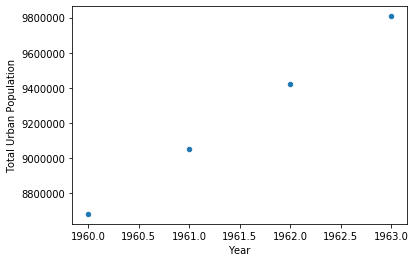

In [21]:
import matplotlib.pyplot as plt

# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_tur['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]

# Plot urban population data
df_pop_tur.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

This time, we will aggregate the results over all the DataFrame chunks in the dataset. 
This basically means we will be processing the entire dataset now.

C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


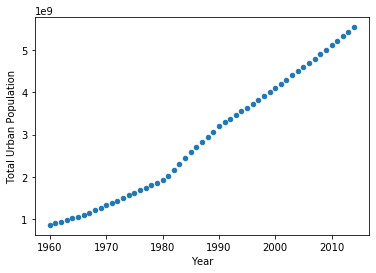

In [22]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('Data/indicators.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_tur
    df_pop_tur = df_urb_pop[df_urb_pop['CountryCode'] == 'TUR']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_tur['Total Population'],
                df_pop_tur['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_tur['Total Urban Population'] = [int(tup[0] * tup[1]) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_tur)

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

Now, we will put all the code for processing the data into a single function
so that you can reuse the code without having to rewrite the same things all over again.
We're going to define the function `plot_pop()` which takes two arguments: the filename of the
file to be processed, and the country code of the rows we want to process in the dataset.
The function will be:
-Loading of the file chunk by chunk,
-Creating the new column of urban population values, and
-Plotting the urban population data.

C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


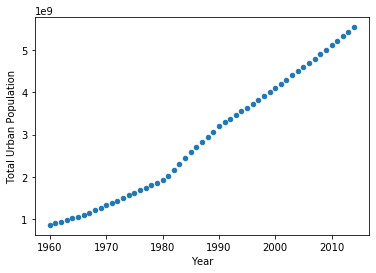

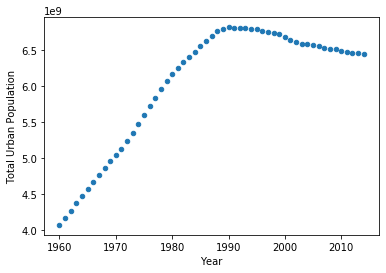

In [25]:
# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1]) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = 'Data/indicators.csv'

# Call plot_pop for country code 'TUR'
plot_pop(fn, 'TUR')

# Call plot_pop for country code 'CEB'
plot_pop(fn, 'CEB')